# **Kütüphaneleri İçe Aktarma**

In [260]:
# Gerekli kütüphanelerin içe aktarılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import SparsePCA, DictionaryLearning, IncrementalPCA
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.feature_selection import SelectFdr, SelectFpr, SelectFwe, f_classif, chi2
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [261]:
# Grafik ayarları
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [262]:
# Veri setinin okunması
df = pd.read_csv('Hotel Reservations.csv')

# **Exploratory Data Analysis**

In [263]:
# Veri seti hakkında genel bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [264]:
# Sayısal sütunların istatistiksel özeti
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [265]:
# Veri setinin boyutları
df.shape

(36275, 19)

In [266]:
# İlk 5 satırın kontrol edilmesi
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [267]:
# Son 5 satırın kontrol edilmesi
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [268]:
# Eksik değer kontrolü
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [269]:
# Tüm featurelar
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [270]:
# Featureların kaç farklı değer içerdiği kontrolü
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [271]:
# Tekrar eden satırların (duplicate) kontrolü
duplic = df.duplicated().sum()
print(f"Tekrar eden kayıt sayısı: {duplic}")

Tekrar eden kayıt sayısı: 0


In [272]:
# Mantıksal hata kontrolü: Hem yetişkin hem çocuk sayısının 0 olduğu kayıtlar mantıksızdır
filtre = (df['no_of_adults'] == 0) & (df['no_of_children'] == 0)
print(f"Hatalı kayıt sayısı: {len(df[filtre])}")

Hatalı kayıt sayısı: 0


In [273]:
# Hedef değişkenin (Booking Status) dağılım oranları
df['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

In [274]:
# Kategorikal veriler
cat_columns = df.select_dtypes(include='object').columns.tolist()
print(cat_columns)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [275]:
# Nümerik veriler
num_columns = df.select_dtypes(include='number').columns.tolist()
print(num_columns)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


# **Veri Görselleştirme**

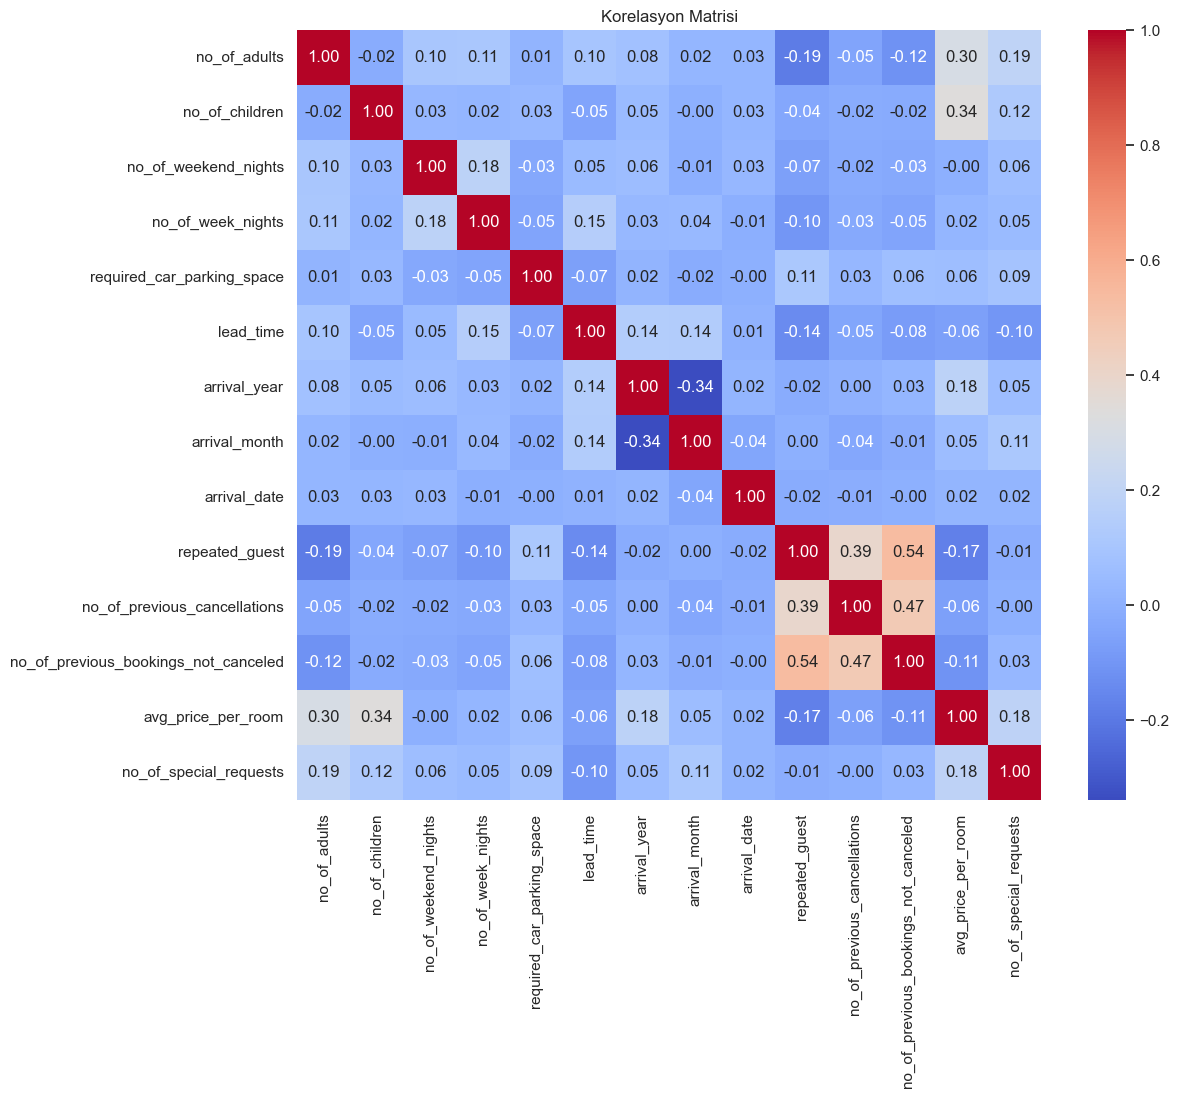

In [276]:
# Sayısal değişkenler arasındaki korelasyon haritası
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

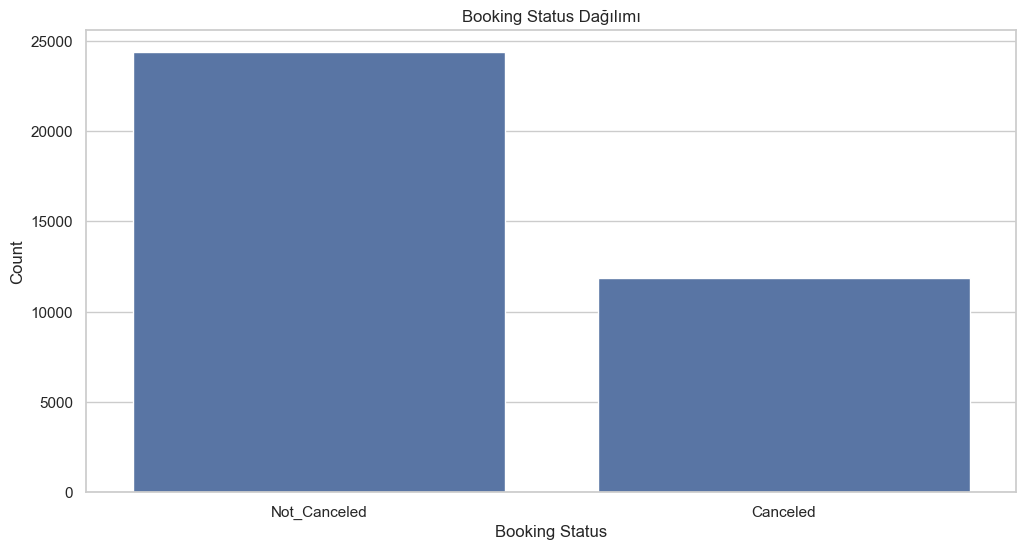

In [277]:
# Rezervasyon iptal durumunun (Target) görselleştirilmesi
sns.countplot(data=df, x='booking_status')
plt.title("Booking Status Dağılımı")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

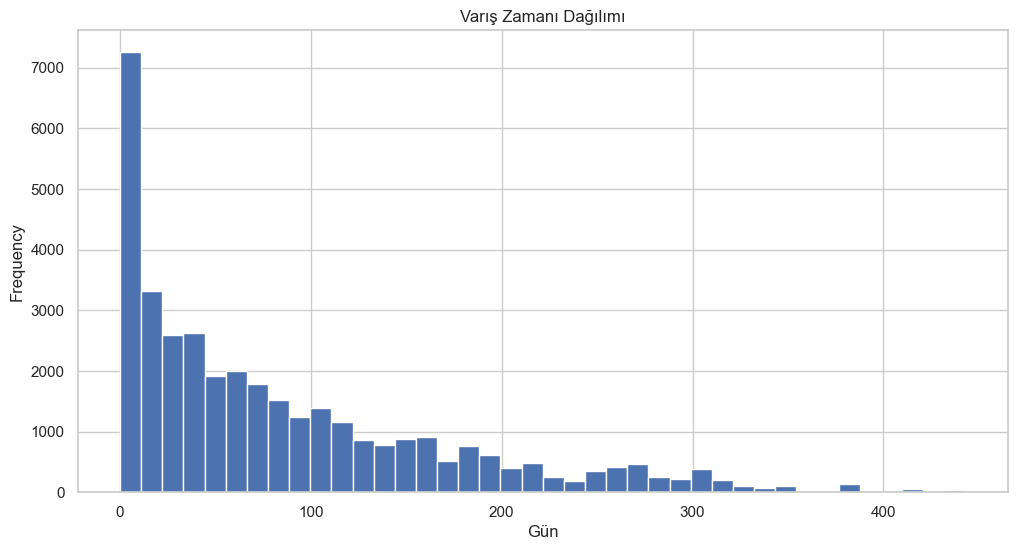

In [278]:
# Rezervasyonun yapıldığı tarih ile otele giriş tarihi arasında geçen gün sayısı
df['lead_time'].plot(kind='hist', bins=40)
plt.title("Varış Zamanı Dağılımı")
plt.xlabel("Gün")
plt.show()

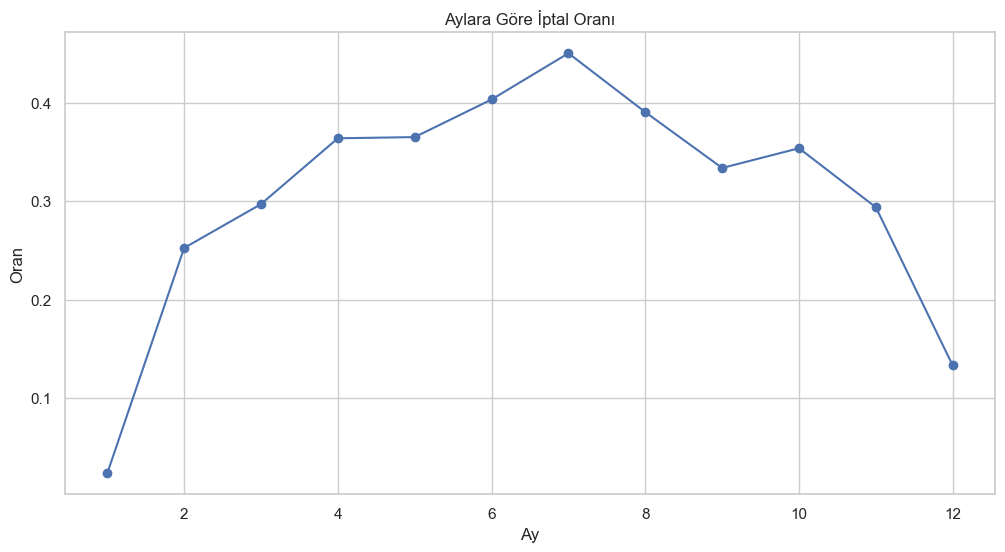

In [279]:
# Aylara göre iptal oranı
monthly_cancel = (df.assign(is_cancel=(df['booking_status']=='Canceled').astype(int))
                    .groupby('arrival_month')['is_cancel'].mean())
monthly_cancel.plot(kind='line', marker='o')
plt.title("Aylara Göre İptal Oranı")
plt.xlabel("Ay")
plt.ylabel("Oran")
plt.show()

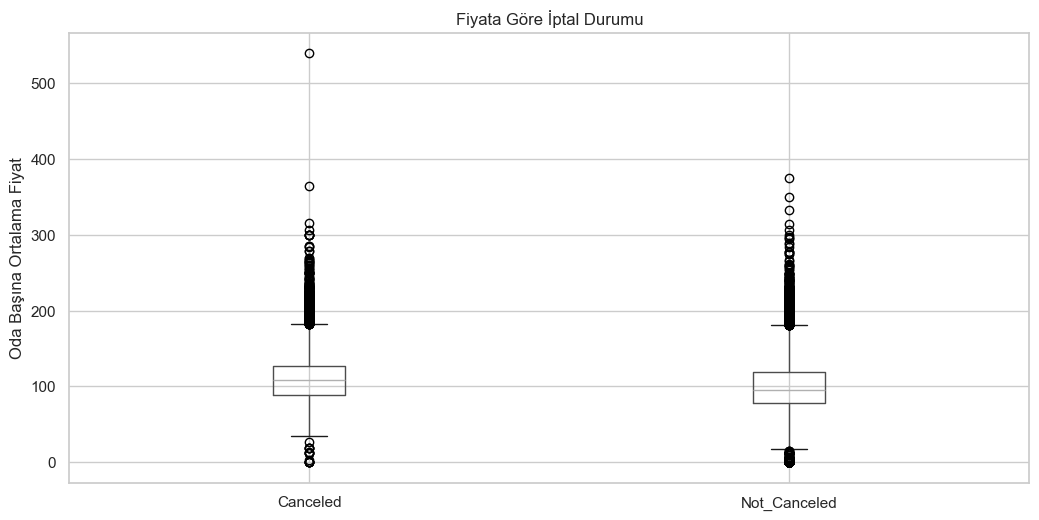

In [280]:
# Fiyata göre iptal oranı
df.boxplot(column='avg_price_per_room', by='booking_status')
plt.suptitle("")
plt.title("Fiyata Göre İptal Durumu")
plt.xlabel("")
plt.ylabel("Oda Başına Ortalama Fiyat")
plt.show()

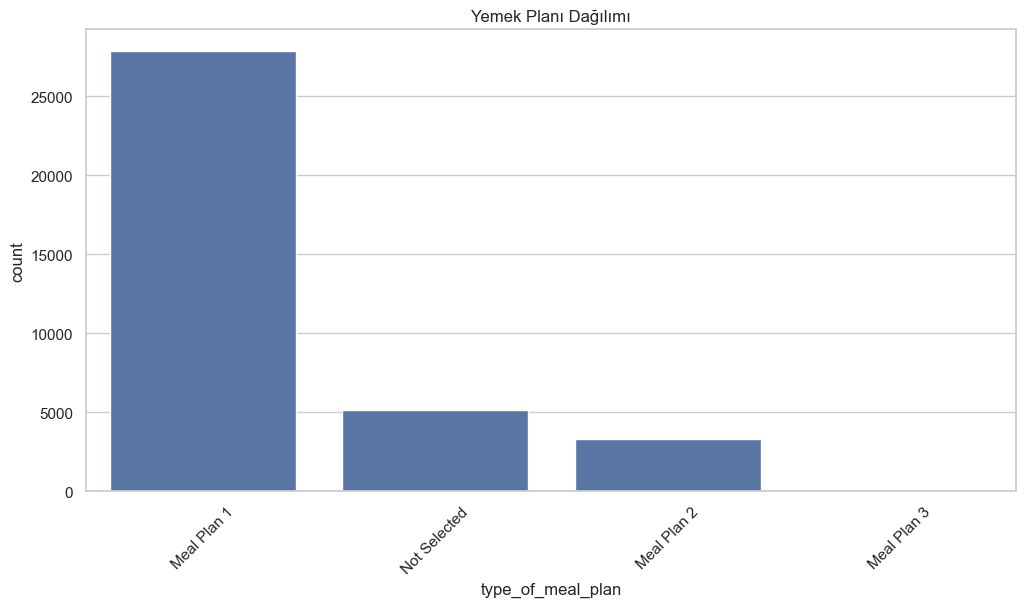

In [281]:
# Yemek planı dağılımı
sns.countplot(data=df, x='type_of_meal_plan')
plt.title("Yemek Planı Dağılımı")
plt.xticks(rotation=45)
plt.show()

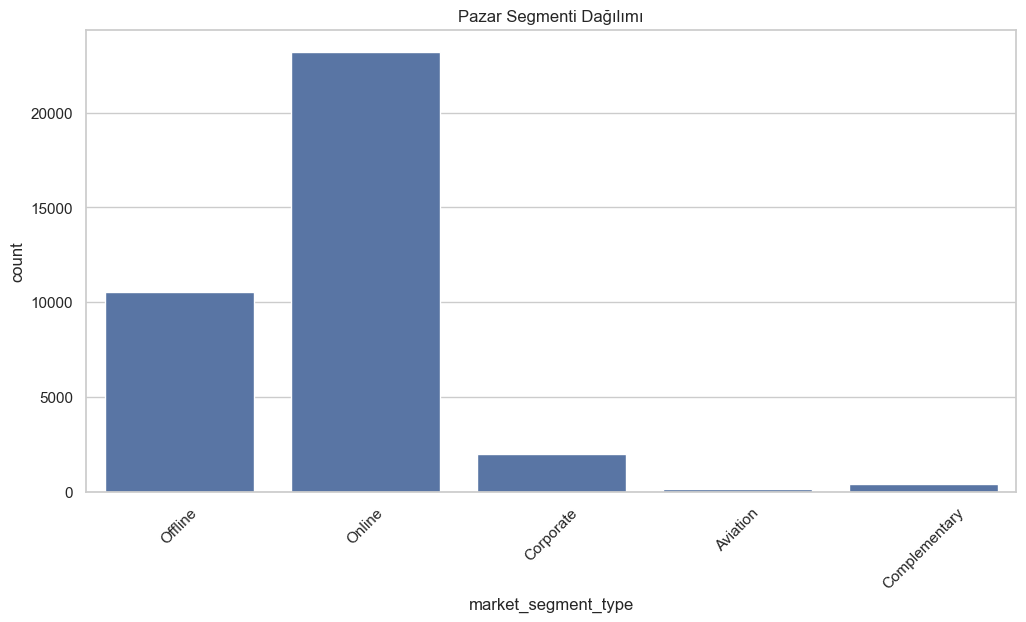

In [282]:
# Pazar segmenti dağılımı
sns.countplot(data=df, x='market_segment_type')
plt.xticks(rotation=45)
plt.title("Pazar Segmenti Dağılımı")
plt.show()

# **Aykırı Değer Analizi**

Text(0.5, 1.0, 'Oda Fiyatı Aykırı Değerleri')

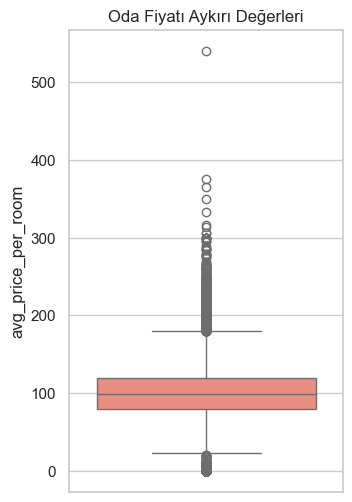

In [283]:
# Oda fiyatları outlier
plt.subplot(1, 3, 1)
sns.boxplot(y=df['avg_price_per_room'], color='salmon')
plt.title('Oda Fiyatı Aykırı Değerleri')

Text(0.5, 1.0, 'Bekleme Süresi (Lead Time) Aykırı Değerleri')

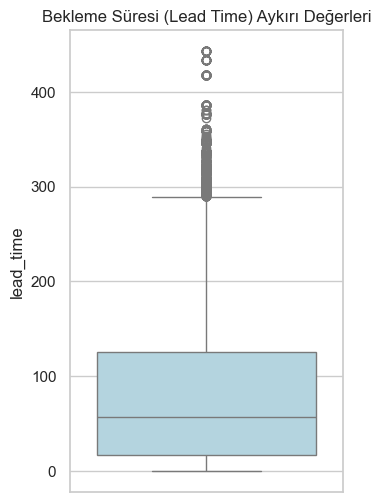

In [284]:
# Bekleme süresi outlier
plt.subplot(1, 3, 2)
sns.boxplot(y=df['lead_time'], color='lightblue')
plt.title('Bekleme Süresi (Lead Time) Aykırı Değerleri')

Text(0.5, 1.0, 'Çocuk Sayısı Aykırı Değerleri')

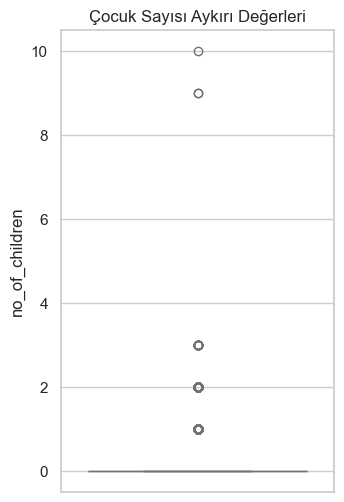

In [285]:
# Çocuk sayısı outlier
plt.subplot(1, 3, 3)
sns.boxplot(y=df['no_of_children'], color='lightgreen')
plt.title('Çocuk Sayısı Aykırı Değerleri')

# **Feature Engineering**

In [286]:
# Fiyatı 0 olan kayıtların temizlenmesi
zero_price = df[df['avg_price_per_room'] == 0]
print("Number of rows with a price of 0:", len(zero_price))
df = df[df['avg_price_per_room'] > 0]

Number of rows with a price of 0: 545


In [287]:
# Model için gereksiz olan ID sütununun düşürülmesi
df = df.drop('Booking_ID', axis=1)

In [288]:
# Toplam gece sayısı ve toplam kişi sayısı gibi yeni sütunlar ekleniyor
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']
df['total_people'] = df['no_of_adults'] + df['no_of_children']

# **Train-Test Split**

In [289]:
# Hedef değişken ve bağımsız değişken
X = df.drop('booking_status', axis=1)
y = df['booking_status']
# Hedef değişkenin sayısal değere dönüştürülmesi
le = LabelEncoder()
y = le.fit_transform(y)
# Verinin %80 eğitim, %20 test olarak ayrılması(target dengesiz olduğu stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

# **Cross-Validation ile Modelleri Değerlendirmek İçin Fonksiyon**

In [290]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name='Model Name'):

    # Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {'roc_auc': 'roc_auc', 'f1': 'f1_weighted', 'recall': 'recall_weighted', 'precision': 'precision_weighted'}
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

    # Test Set Evaluation
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Handle classifiers with and without predict_proba
    # Get the final estimator from the pipeline
    final_estimator = pipeline.steps[-1][1]
    
    if hasattr(final_estimator, 'predict_proba'):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    elif hasattr(final_estimator, 'decision_function'):
        # For RidgeClassifier, use decision_function and normalize to [0,1] range
        y_decision_train = pipeline.decision_function(X_train)
        y_decision_test = pipeline.decision_function(X_test)
        # Normalize decision scores to probability-like range using min-max scaling
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaler.fit(y_decision_train.reshape(-1, 1))
        y_prob = scaler.transform(y_decision_test.reshape(-1, 1)).flatten()
    else:
        # Fallback: use predicted probabilities from predictions
        y_prob = y_pred.astype(float)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 14}, linewidths=0.5)
    plt.title(f'{model_name} - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted', fontsize=11)
    plt.ylabel('Actual', fontsize=11)
    plt.show()

    return {
        'Model': model_name,

        # Test Seti Skorları (Tek seferlik test)
        'Test F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_pred, average='weighted'),
        'Test ROC-AUC': roc_auc_score(y_test, y_prob),

        # Cross Validation Skorları (Ortalama Performans)
        'CV Mean F1': cv_results['test_f1'].mean(),
        'CV Mean Recall': cv_results['test_recall'].mean(),
        'CV Mean Precision': cv_results['test_precision'].mean(),
        'CV Mean ROC-AUC': cv_results['test_roc_auc'].mean()
    }

# **Preprocessor**

In [291]:
# Eğitim setindeki kategorik ve sayısal sütunların belirlenmesi
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']

In [292]:
# Sayısal veriler için Standartlaştırma (StandardScaler)
# Kategorik veriler için One-Hot Encoding (OneHotEncoder) işlemi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# **SGD Classifier Tüm Senaryolar**

### **1. Sadece Preprocessing**

In [293]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=2000, random_state=42, class_weight='balanced'))
])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


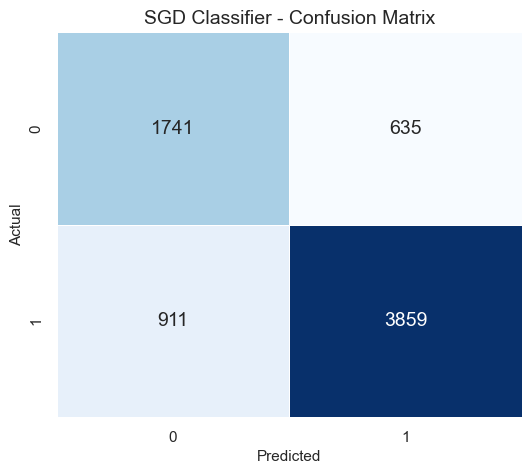

In [294]:
results_lr = evaluate_model(
    pipeline_lr,
    X_train, y_train,
    X_test, y_test,
    model_name='SGD Classifier'
)

In [295]:
metrics_lr = pd.DataFrame([results_lr])
print(metrics_lr)

            Model  Test F1 Score  Test Recall  Test Precision  Test ROC-AUC  \
0  SGD Classifier        0.78637     0.783655        0.791465      0.856724   

   CV Mean F1  CV Mean Recall  CV Mean Precision  CV Mean ROC-AUC  
0    0.778755         0.77435            0.79158         0.855625  


### **2. Preprocessing + Dimension Reduction(SparsePCA)**

In [296]:
pipeline_lr_spca = Pipeline([
    ('preprocessor', preprocessor),
    ('spca', SparsePCA(n_components=15, random_state=42, max_iter=1000)),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=2000, random_state=42, class_weight='balanced'))
])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


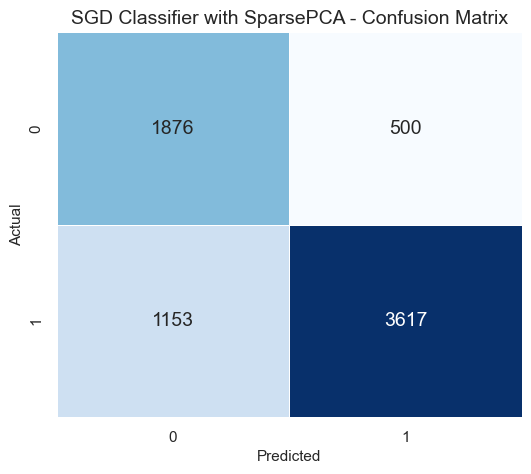

In [297]:
results_lr_spca = evaluate_model(
    pipeline_lr_spca,
    X_train, y_train,
    X_test, y_test,
    model_name='SGD Classifier with SparsePCA'
)

In [298]:
metrics_lr_spca = pd.DataFrame([results_lr_spca])
print(metrics_lr_spca)

                           Model  Test F1 Score  Test Recall  Test Precision  \
0  SGD Classifier with SparsePCA       0.774157     0.768682        0.792368   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0      0.852451    0.776711        0.771936           0.790827   

   CV Mean ROC-AUC  
0         0.853261  


### **3. Preprocessing + Feature Selection(SelectFdr)**

In [299]:
# SelectFdr with f_classif for feature selection
pipe_lr_fdr = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFdr(score_func=f_classif, alpha=0.05)),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=2000, random_state=42, class_weight='balanced'))
])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


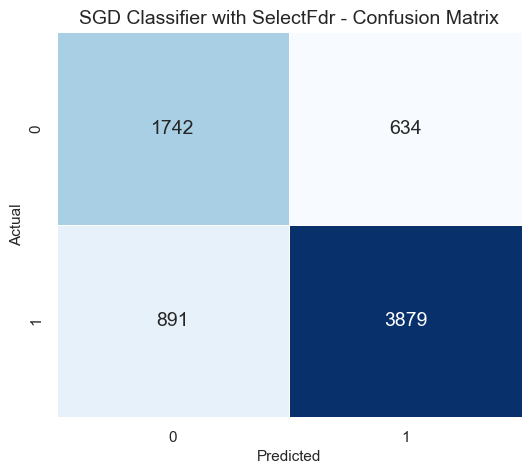

In [300]:
results_lr_fdr = evaluate_model(
    pipe_lr_fdr,
    X_train, y_train,
    X_test, y_test,
    model_name='SGD Classifier with SelectFdr'
)

In [301]:
metrics_lr_fdr = pd.DataFrame([results_lr_fdr])
print(metrics_lr_fdr)

                           Model  Test F1 Score  Test Recall  Test Precision  \
0  SGD Classifier with SelectFdr       0.789115     0.786594        0.793712   

   Test ROC-AUC  CV Mean F1  CV Mean Recall  CV Mean Precision  \
0       0.85654    0.781438        0.777218           0.794238   

   CV Mean ROC-AUC  
0         0.854462  


### **4. Preprocessing + Feature Selection(SelectFdr) + Dimension Reduction (DictionaryLearning)**

In [302]:
# SelectFdr + DictionaryLearning combination
pipe_lr_fdr_dict = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFdr(score_func=f_classif, alpha=0.05)),
    ('dict_learning', DictionaryLearning(n_components=15, random_state=42, max_iter=1000)),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=2000, random_state=42, class_weight='balanced'))
])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


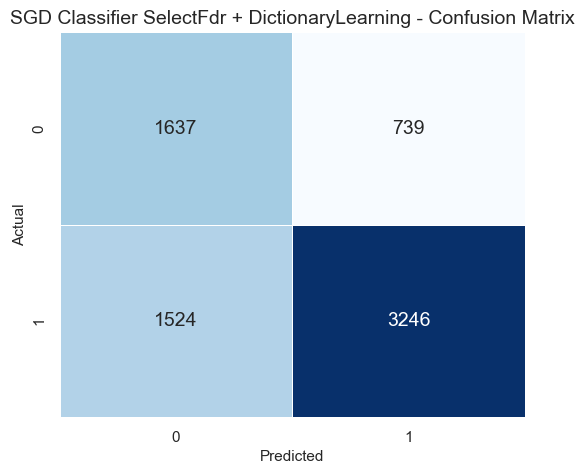

In [303]:
results_lr_fdr_dict = evaluate_model(
    pipe_lr_fdr_dict,
    X_train, y_train,
    X_test, y_test,
    model_name='SGD Classifier SelectFdr + DictionaryLearning'
)

In [304]:
metrics_lr_fdr_dict = pd.DataFrame([results_lr_fdr_dict])
print(metrics_lr_fdr_dict)

                                           Model  Test F1 Score  Test Recall  \
0  SGD Classifier SelectFdr + DictionaryLearning       0.691571     0.683319   

   Test Precision  Test ROC-AUC  CV Mean F1  CV Mean Recall  \
0         0.71591      0.764063    0.688772        0.680066   

   CV Mean Precision  CV Mean ROC-AUC  
0           0.723637         0.771827  


# **Ridge Classifier Tüm Senaryolar**

### **1. Sadece Preprocessing**

In [305]:
pipeline_tree = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RidgeClassifier(alpha=1.0, class_weight='balanced', random_state=42))
    ])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


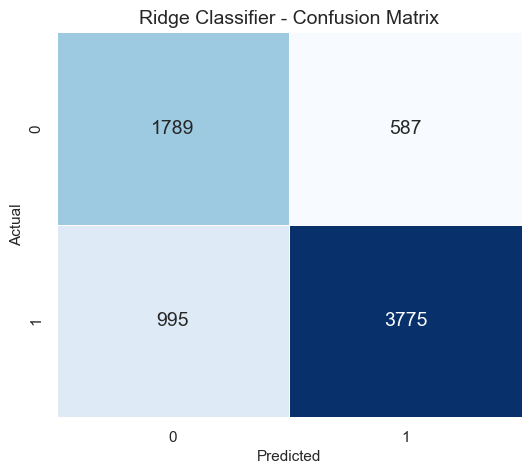

In [306]:
results_tree = evaluate_model(
    pipeline_tree,
    X_train, y_train,
    X_test, y_test,
    model_name='Ridge Classifier'
)

In [307]:
metrics_tree = pd.DataFrame([results_tree])
print(metrics_tree)

              Model  Test F1 Score  Test Recall  Test Precision  Test ROC-AUC  \
0  Ridge Classifier       0.782424     0.778617         0.79134       0.85745   

   CV Mean F1  CV Mean Recall  CV Mean Precision  CV Mean ROC-AUC  
0     0.78329        0.779352           0.793079         0.860667  


### **2. Preprocessing + Dimension Reduction(IncrementalPCA)**

In [308]:
pipeline_tree_ipca = Pipeline([
        ('preprocessor', preprocessor),
        ('ipca', IncrementalPCA(n_components=15)),
        ('classifier', RidgeClassifier(alpha=1.0, class_weight='balanced', random_state=42))
    ])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


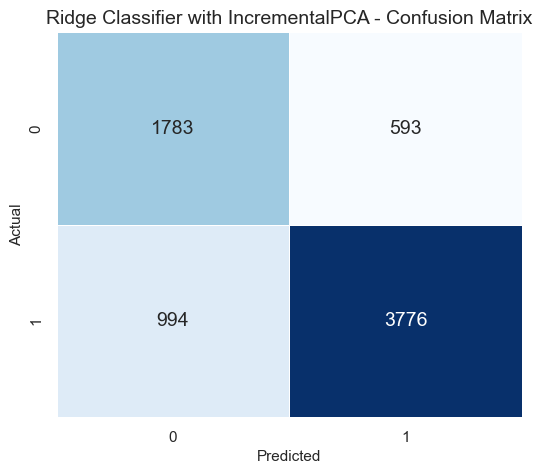

In [309]:
results_tree_ipca = evaluate_model(
    pipeline_tree_ipca,
    X_train, y_train,
    X_test, y_test,
    model_name='Ridge Classifier with IncrementalPCA'
)

In [310]:
metrics_tree_ipca = pd.DataFrame([results_tree_ipca])
print(metrics_tree_ipca)

                                  Model  Test F1 Score  Test Recall  \
0  Ridge Classifier with IncrementalPCA       0.781687     0.777918   

   Test Precision  Test ROC-AUC  CV Mean F1  CV Mean Recall  \
0        0.790387      0.856616    0.782399        0.778513   

   CV Mean Precision  CV Mean ROC-AUC  
0           0.791831         0.859536  


### **3. Preprocessing + Feature Selection(SelectFpr)**

In [311]:
# SelectFpr with f_classif for feature selection
pipeline_tree_fpr = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectFpr(score_func=f_classif, alpha=0.05)),
        ('classifier', RidgeClassifier(alpha=1.0, class_weight='balanced', random_state=42))
    ])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


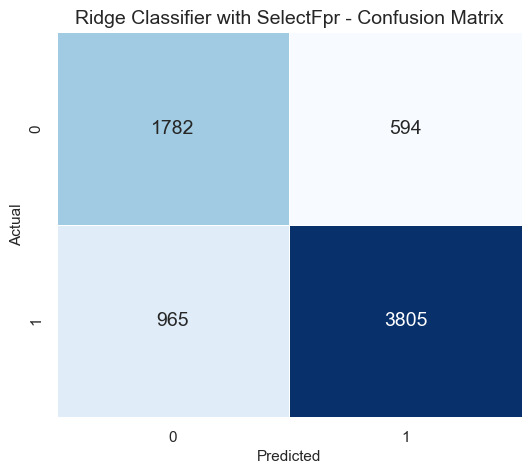

In [312]:
results_tree_fpr = evaluate_model(
    pipeline_tree_fpr,
    X_train, y_train,
    X_test, y_test,
    model_name='Ridge Classifier with SelectFpr'
)

In [313]:
metrics_tree_fpr = pd.DataFrame([results_tree_fpr])
print(metrics_tree_fpr)

                             Model  Test F1 Score  Test Recall  \
0  Ridge Classifier with SelectFpr       0.785322     0.781836   

   Test Precision  Test ROC-AUC  CV Mean F1  CV Mean Recall  \
0        0.793064      0.857392    0.787433          0.7839   

   CV Mean Precision  CV Mean ROC-AUC  
0            0.79567           0.8597  


### **4. Preprocessing + Feature Selection(SelectFpr) + Dimension Reduction (SparsePCA)**

In [314]:
# SelectFpr + SparsePCA combination
pipeline_tree_fpr_spca = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectFpr(score_func=f_classif, alpha=0.05)),
        ('spca', SparsePCA(n_components=15, random_state=42, max_iter=1000)),
        ('classifier', RidgeClassifier(alpha=1.0, class_weight='balanced', random_state=42))
    ])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


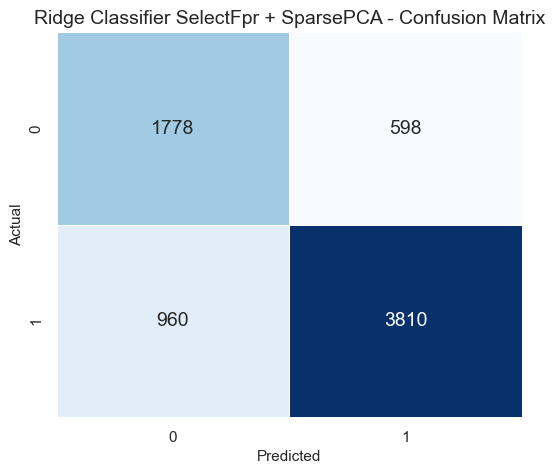

In [315]:
results_tree_fpr_spca = evaluate_model(
    pipeline_tree_fpr_spca,
    X_train, y_train,
    X_test, y_test,
    model_name='Ridge Classifier SelectFpr + SparsePCA'
)

In [316]:
metrics_tree_fpr_spca = pd.DataFrame([results_tree_fpr_spca])
print(metrics_tree_fpr_spca)

                                    Model  Test F1 Score  Test Recall  \
0  Ridge Classifier SelectFpr + SparsePCA       0.785393     0.781976   

   Test Precision  Test ROC-AUC  CV Mean F1  CV Mean Recall  \
0        0.792865      0.857136    0.786278        0.782711   

   CV Mean Precision  CV Mean ROC-AUC  
0           0.794613         0.859437  


# **Sonuçlar Tablo Halinde**

In [317]:
# Tüm sonuçları bir topla
all_results = pd.DataFrame([
    results_lr,
    results_lr_spca,
    results_lr_fdr,
    results_lr_fdr_dict,
    results_tree,
    results_tree_ipca,
    results_tree_fpr,
    results_tree_fpr_spca
])

# ROC-AUC değerine göre sıralama
comparison_df = all_results.sort_values(by='Test ROC-AUC', ascending=False).reset_index(drop=True)

# Görselleştirme
comparison_df.style.background_gradient(
    cmap='YlOrRd',
    subset=[
        'Test F1 Score', 'Test Recall', 'Test Precision', 'Test ROC-AUC',
        'CV Mean F1', 'CV Mean Recall', 'CV Mean Precision', 'CV Mean ROC-AUC'
    ]
).format("{:.4f}", subset=[
        'Test F1 Score', 'Test Recall', 'Test Precision', 'Test ROC-AUC',
        'CV Mean F1', 'CV Mean Recall', 'CV Mean Precision', 'CV Mean ROC-AUC'
])

,Model,Test F1 Score,Test Recall,Test Precision,Test ROC-AUC,CV Mean F1,CV Mean Recall,CV Mean Precision,CV Mean ROC-AUC
0,Ridge Classifier,0.7824,0.7786,0.7913,0.8575,0.7833,0.7794,0.7931,0.8607
1,Ridge Classifier with SelectFpr,0.7853,0.7818,0.7931,0.8574,0.7874,0.7839,0.7957,0.8597
2,Ridge Classifier SelectFpr + SparsePCA,0.7854,0.7820,0.7929,0.8571,0.7863,0.7827,0.7946,0.8594
3,SGD Classifier,0.7864,0.7837,0.7915,0.8567,0.7788,0.7743,0.7916,0.8556
4,Ridge Classifier with IncrementalPCA,0.7817,0.7779,0.7904,0.8566,0.7824,0.7785,0.7918,0.8595
5,SGD Classifier with SelectFdr,0.7891,0.7866,0.7937,0.8565,0.7814,0.7772,0.7942,0.8545
6,SGD Classifier with SparsePCA,0.7742,0.7687,0.7924,0.8525,0.7767,0.7719,0.7908,0.8533
7,SGD Classifier SelectFdr + DictionaryLearning,0.6916,0.6833,0.7159,0.7641,0.6888,0.6801,0.7236,0.7718
